# Flight Price Prediction
### Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

### FEATURES:
* **Airline**: The name of the airline.
* **Date_of_Journey**: The date of the journey
* **Source**: The source from which the service begins.
* **Destination**: The destination where the service ends.
* **Route**: The route taken by the flight to reach the destination.
* **Dep_Time**: The time when the journey starts from the source.
* **Arrival_Time**: Time of arrival at the destination.
* **Duration**: Total duration of the flight.
* **Total_Stops**: Total stops between the source and destination.
* **Additional_Info**: Additional information about the flight
* **Price**: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

 

Note: You can find the dataset in the link below. 



Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects


## Importing Necessery liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as stats

from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import warnings

In [2]:
#Importing dataset
df = pd.read_excel(r"D:\data scienctist\projects\Evolution Projects\Evolution projects data\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


here we can see The dataset contains the details prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.
* This dataset is comprised of 10683 rows and 11 columns including one target varibale i.e. 'Price'.

In [3]:
# to get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


So here we can see the dataset contains different features with different data types.
* There are two types of data namely object type(10 columns) and int64 data type(target column).
* We will take care of the object datatype using encoding techniques later.
* In data set the column 'Date_of_Journey' has full date and in object data type so we need to split that and convert it in int format later. 
* Same for columns 'Dep_Time', 'Arrival_Time' & 'Duration'.

In [4]:
#Checking the number of unique values in each columns:
df.nunique().to_frame('Number of Unique Values')

,Number of Unique Values
Airline,12
Date_of_Journey,44
Source,5
Destination,6
Route,128
Dep_Time,222
Arrival_Time,1343
Duration,368
Total_Stops,5
Additional_Info,10


In [5]:
#Checking the value counts of each of the columns

for i, j in zip(df.columns, range(1,12)):
    print(f"""{j}. Column '{i}' :
{df[i].value_counts()}
___________________________________""")

1. Column 'Airline' :
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
___________________________________
2. Column 'Date_of_Journey' :
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/

Here we can see, 
* In Column 'Destination' we have 'delhi' and 'new delhi' so we are going to merge them.
* In column 'Additional_Info' here we will replace 'No Info' with 'No info'.
* In column 'Airline' we will combine 'Jet Airways Business' with 'Jet Airways', 'Multiple carriers Premium economy' with 'Multiple carriers' & 'Vistara Premium economy' with 'Vistara'.
* In column "Total_Stops": As this is case of Ordinal Categorical type, we will assign values to corresponding keys

In [6]:
df['Destination'] = df['Destination'].replace('New Delhi','Delhi')

In [7]:
df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [8]:
df["Additional_Info"].replace("No Info","No info",inplace=True)

In [9]:
df["Additional_Info"].value_counts()

No info                         8348
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [10]:
df["Airline"].replace("Jet Airways Business","Jet Airways",inplace=True)

df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)

df["Airline"].replace("Vistara Premium economy","Vistara",inplace=True)

In [11]:
df["Airline"].value_counts()

Jet Airways          3855
IndiGo               2053
Air India            1752
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64

In [12]:
df.replace({"non-stop": 0,
            "1 stop": 1,
            "2 stops": 2,
            "3 stops": 3,
            "4 stops": 4},
           inplace = True)

In [13]:
df["Total_Stops"].value_counts()

1.0    5625
0.0    3491
2.0    1520
3.0      45
4.0       1
Name: Total_Stops, dtype: int64

### Checking Null values:

In [14]:
# checking the null values in the dataframe
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [15]:
for i in df:
    percentage = np.round((df[i].isnull().sum()/614)*100,2)
    print(i,':' , percentage,'%')

Airline : 0.0 %
Date_of_Journey : 0.0 %
Source : 0.0 %
Destination : 0.0 %
Route : 0.16 %
Dep_Time : 0.0 %
Arrival_Time : 0.0 %
Duration : 0.0 %
Total_Stops : 0.16 %
Additional_Info : 0.0 %
Price : 0.0 %


### Removing Null values

In [16]:
# Dropping null value rows as we have only two null values rows
df.dropna( axis=0, how="any", thresh=None, subset=None, inplace=True)

In [17]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

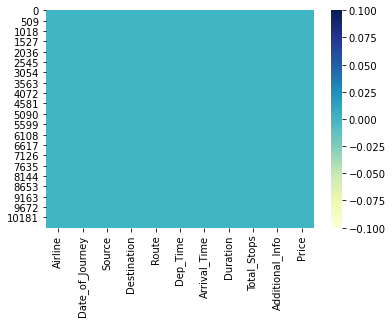

In [18]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull(),cmap="YlGnBu")

* We can see, we have sucessfully removed the NaN values from our dataset, now let's check the duplicate values.

In [19]:
# Checking duplicated values

df.duplicated().sum()

220

* We have 220 duplicate values, need to drop.

In [20]:
df.drop_duplicates()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,6218
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0.0,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0.0,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0.0,No info,7229
10681,Vistara,01/03/2019,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,0.0,No info,12648


In [21]:
# checking the data loss after dealing with null and duplicate values
data_loss = (10684-10462)/10684*100
print(f"""data_loss after dealing with null and duplicate values : {data_loss} %""")

data_loss after dealing with null and duplicate values : 2.077873455634594 %


In [22]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### Dealing with data types of columns 'Date_of_Journey', 'Dep_Time', 'Arrival_Time' & 'Duration'

In [23]:
df['Day_of_Journey'] = pd.to_datetime(df.Date_of_Journey, format = '%d/%m/%Y').dt.day
df['Month_of_Journey'] = pd.to_datetime(df.Date_of_Journey, format = '%d/%m/%Y').dt.month

In [24]:
df['Dep_hour'] = pd.to_datetime(df.Dep_Time).dt.hour
df['Dep_min'] = pd.to_datetime(df.Dep_Time).dt.minute

In [25]:
df['Arrival_hour'] = pd.to_datetime(df.Arrival_Time).dt.hour
df['Arrival_min'] = pd.to_datetime(df.Arrival_Time).dt.minute

In [26]:
duration = list(df.Duration)

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i]= duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]
            
            

duration_hour=[]
duration_minute = []

for i in range (len(duration)):
    duration_hour.append(int(duration[i].split(sep='h')[0]))
    duration_minute.append(int(duration[i].split(sep = 'm')[0].split()[-1]))
        

In [27]:
df['Duration_hours'] = duration_hour
df['Duration_mins']= duration_minute

In [28]:
df.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time','Duration'], inplace = True)

In [29]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,BLR → DEL,0.0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1.0,No info,13302,1,3,16,50,21,35,4,45


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10682 non-null  object 
 1   Source            10682 non-null  object 
 2   Destination       10682 non-null  object 
 3   Route             10682 non-null  object 
 4   Total_Stops       10682 non-null  float64
 5   Additional_Info   10682 non-null  object 
 6   Price             10682 non-null  int64  
 7   Day_of_Journey    10682 non-null  int64  
 8   Month_of_Journey  10682 non-null  int64  
 9   Dep_hour          10682 non-null  int64  
 10  Dep_min           10682 non-null  int64  
 11  Arrival_hour      10682 non-null  int64  
 12  Arrival_min       10682 non-null  int64  
 13  Duration_hours    10682 non-null  int64  
 14  Duration_mins     10682 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 1.3+ MB


## Data Visualization:
### 1. Univariate Analysis:

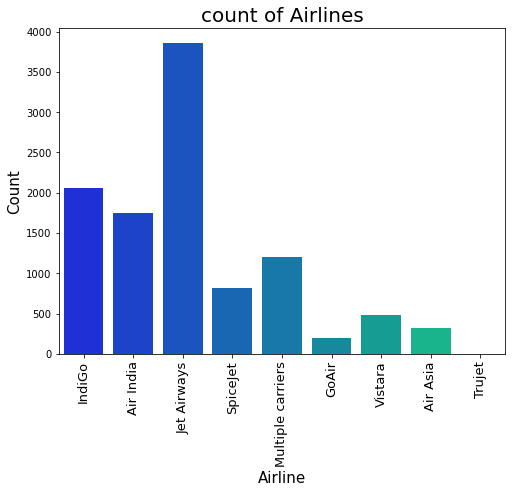

In [31]:
# 1. Visualizing the Airlines
plt.figure(figsize=(8,6))
sns.countplot(x = 'Airline', data = df ,palette = 'winter')

plt.title('count of Airlines',fontsize=20)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13 ,rotation=90)

plt.show()

* We can see we have more flights with Jet Airways and Indigo comes second

C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


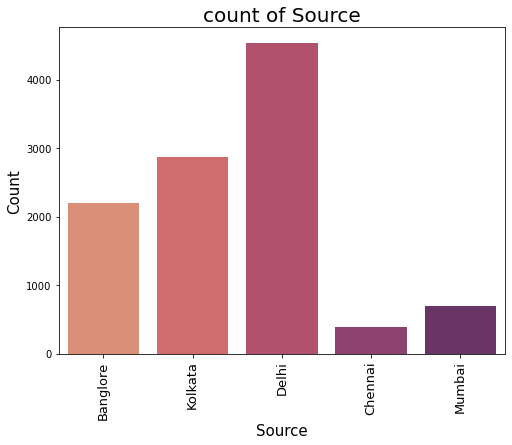

In [32]:
# 2. Visualizing the Source
plt.figure(figsize=(8,6))
sns.countplot('Source', data = df ,palette = 'flare')

plt.title('count of Source',fontsize=20)
plt.xlabel('Source',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13 ,rotation=90)

plt.show()

* We have more number of flights leaving from Delhi and least number of flights leaving from Chennai.

C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


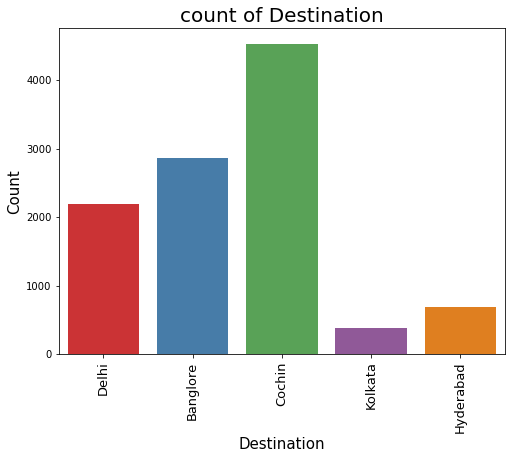

In [33]:
# 3. Visualizing the 'Destination'
plt.figure(figsize=(8,6))
sns.countplot('Destination', data = df ,palette = 'Set1')

plt.title('count of Destination',fontsize=20)
plt.xlabel('Destination',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13 ,rotation=90)

plt.show()

* We have more flights reaching Cochin and banglore and Least flights for Hyderabad and Kolkata.

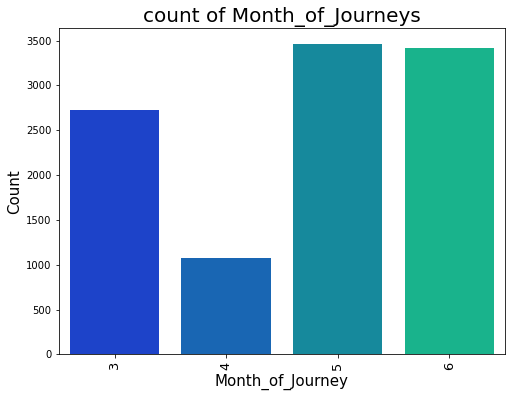

In [34]:
# 1. Visualizing the count of month of journey
plt.figure(figsize=(8,6))
sns.countplot(x = 'Month_of_Journey', data = df ,palette = 'winter')

plt.title('count of Month_of_Journeys',fontsize=20)
plt.xlabel('Month_of_Journey',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13 ,rotation=90)

plt.show()

* We have more people who travelled in moth 5th and 6th (i.e. May & June)
* we can see, in 4th month (April) less people travel.

### 2. Bivariate Analysis (Checking relation between features and label):

In [35]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

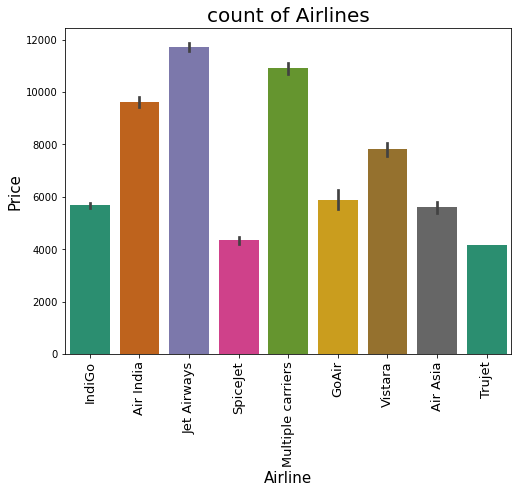

In [36]:
# 1. Visualizing the Airlines
plt.figure(figsize=(8,6))
sns.barplot(x = "Airline", y = "Price", data=df ,palette = 'Dark2')

plt.title('count of Airlines',fontsize=20)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(fontsize=13 ,rotation=90)

plt.show()

* By above plot we can say that the Jet Airways is most expensive airline, followed by Multiple carriers Airline and Air India.
* Spicejet and Trujet Airlines are cheaper compared to others.

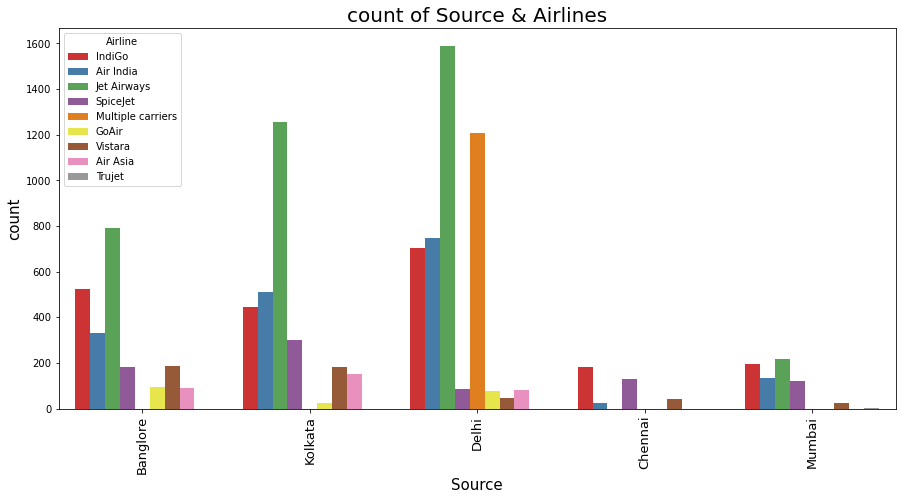

In [37]:
# 2. Visualizing the count of Source & Airlines
plt.figure(figsize=(15,7))
sns.countplot(x = "Source", hue = "Airline", data = df ,palette = 'Set1')

plt.title('count of Source & Airlines',fontsize=20)
plt.xlabel('Source',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(fontsize=13 ,rotation=90)

plt.show()

* We can say that the Jet Airways airline is much popular than others in every region except in chennai.
* And we can see Multiple carrier airlines is only associates with Delhi region.

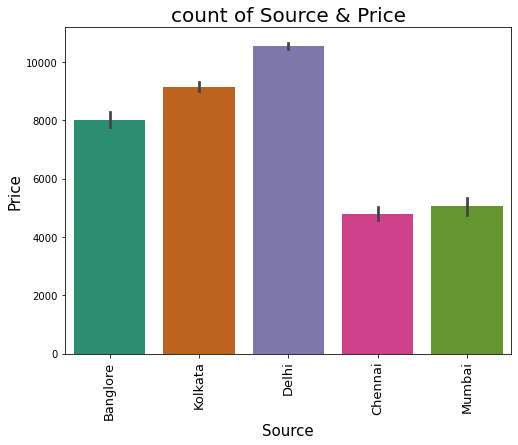

In [38]:
# 3. Visualizing the source of Airlines and their prices
plt.figure(figsize=(8,6))
sns.barplot(x = "Source", y = "Price", data=df ,palette = 'Dark2')

plt.title('count of Source & Price',fontsize=20)
plt.xlabel('Source',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(fontsize=13 ,rotation=90)

plt.show()

* We can see here flights from Delhi are high in count and also have high prices , while Chennai are the least.
* This is because we have seen the data is imbalance.

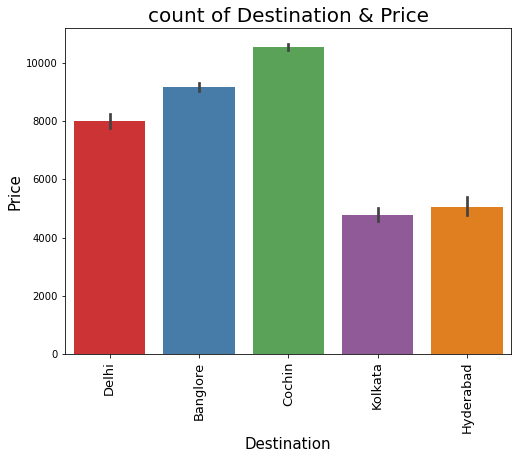

In [39]:
# 4. Visualizing the Destination of Airlines and their prices
plt.figure(figsize=(8,6))
sns.barplot(x = "Destination", y = "Price", data=df ,palette = 'Set1')

plt.title('count of Destination & Price',fontsize=20)
plt.xlabel('Destination',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(fontsize=13 ,rotation=90)

plt.show()

* We can see flights to the cochin are having high prices and may have some outliers.
* This is because we have seen the data is imbalance.

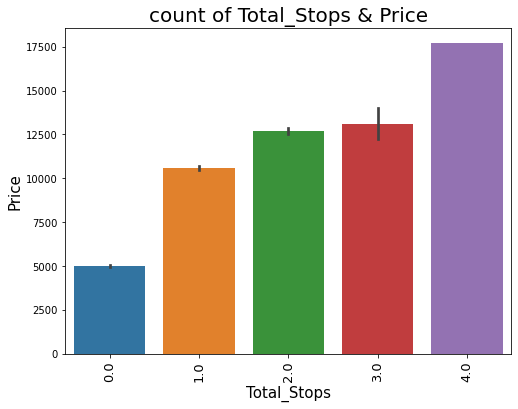

In [40]:
# 5. Visualizing the Total_Stops of Airlines and their prices
plt.figure(figsize=(8,6))
sns.barplot(x = "Total_Stops", y = "Price", data=df)

plt.title('count of Total_Stops & Price',fontsize=20)
plt.xlabel('Total_Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(fontsize=13 ,rotation=90)

plt.show()

* Here we can cearly see that, price is directly proportional to the stops.
* if stops increases, the price is also increases.

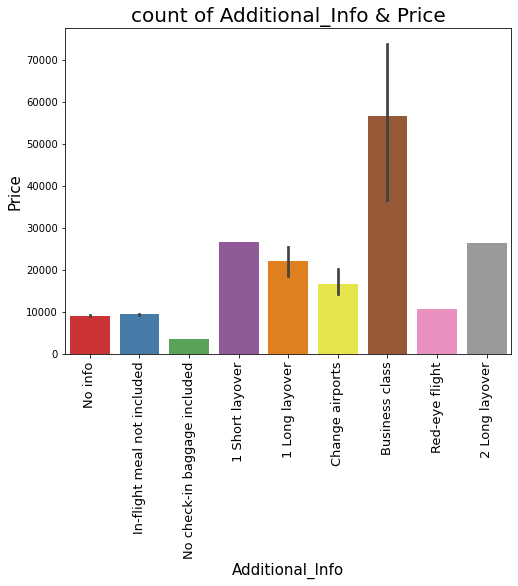

In [41]:
# 6. Visualizing the Additional_Info of Airlines and their prices
plt.figure(figsize=(8,6))
sns.barplot(x = "Additional_Info", y = "Price", data=df ,palette = 'Set1')

plt.title('count of Additional_Info & Price',fontsize=20)
plt.xlabel('Additional_Info',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(fontsize=13 ,rotation=90)

plt.show()

* This will tell us that the Business class flights are much expencive than others, and the flight with No check-in baggage included class has least price.

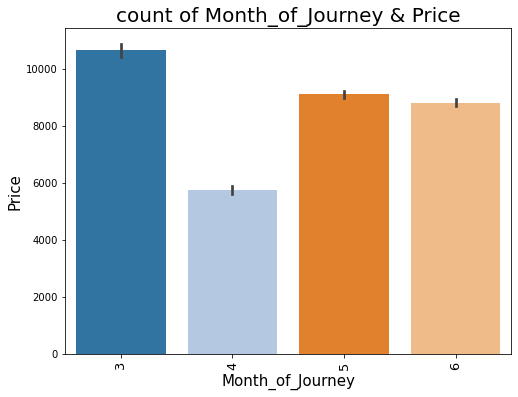

In [42]:
# 7. Visualizing the Month_of_Journey of Airlines and their prices
plt.figure(figsize=(8,6))
sns.barplot(x = "Month_of_Journey", y = "Price", data=df ,palette = 'tab20')

plt.title('count of Month_of_Journey & Price',fontsize=20)
plt.xlabel('Month_of_Journey',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(fontsize=13 ,rotation=90)

plt.show()

* Irrespective of counts of journy in months, the price in 3rd month (March) is high. 

### Encoding

In [43]:
#lets convert categorical data into numeric values, using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == "object" :
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [44]:
#lets have a look on data after encoding
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3.0,0.0,2.0,18.0,0.0,7.0,3897,24,3,22,20,1,10,2,50
1,1.0,3.0,0.0,84.0,2.0,7.0,7662,1,5,5,50,13,15,7,25
2,4.0,2.0,1.0,118.0,2.0,7.0,13882,9,6,9,25,4,25,19,0
3,3.0,3.0,0.0,91.0,1.0,7.0,6218,12,5,18,5,23,30,5,25
4,3.0,0.0,2.0,29.0,1.0,7.0,13302,1,3,16,50,21,35,4,45


### Heat map for checking correlation

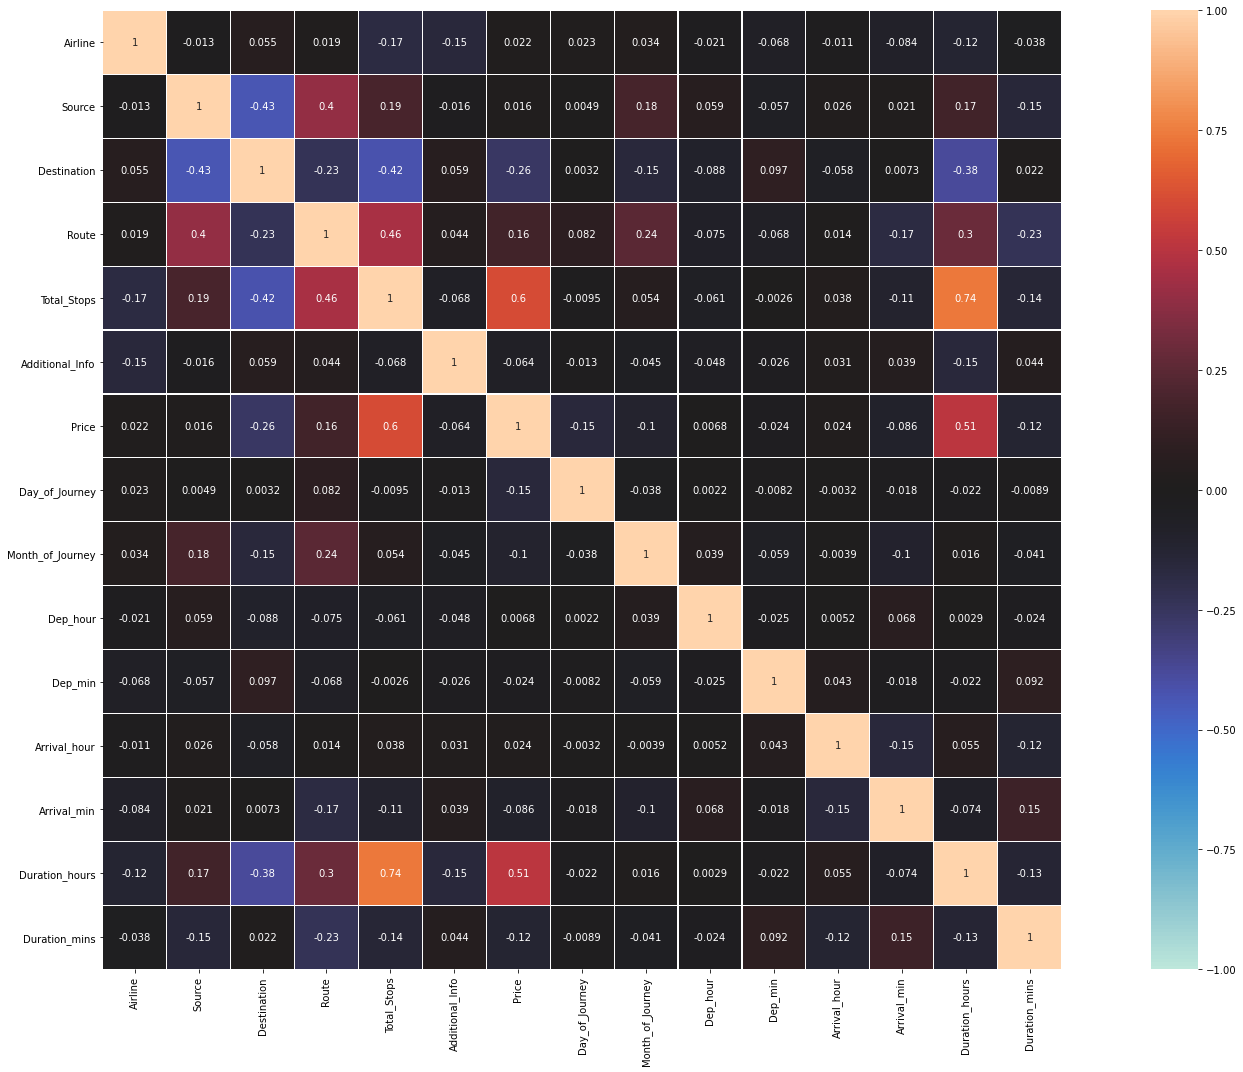

In [45]:
#Lets plot heatmap to check correlation among differnt features and label
df_corr = df.corr()
plt.figure(figsize = (25,15))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()

* By looking at the heat map we can say Total_stops has maximum correlation with price.
* column Total_stops is highly correlated with Duration hours.
* Column Destination and Total stops are strongly and negatively related to each other.

## Checking for Outliers:

C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Abhimanyu\

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

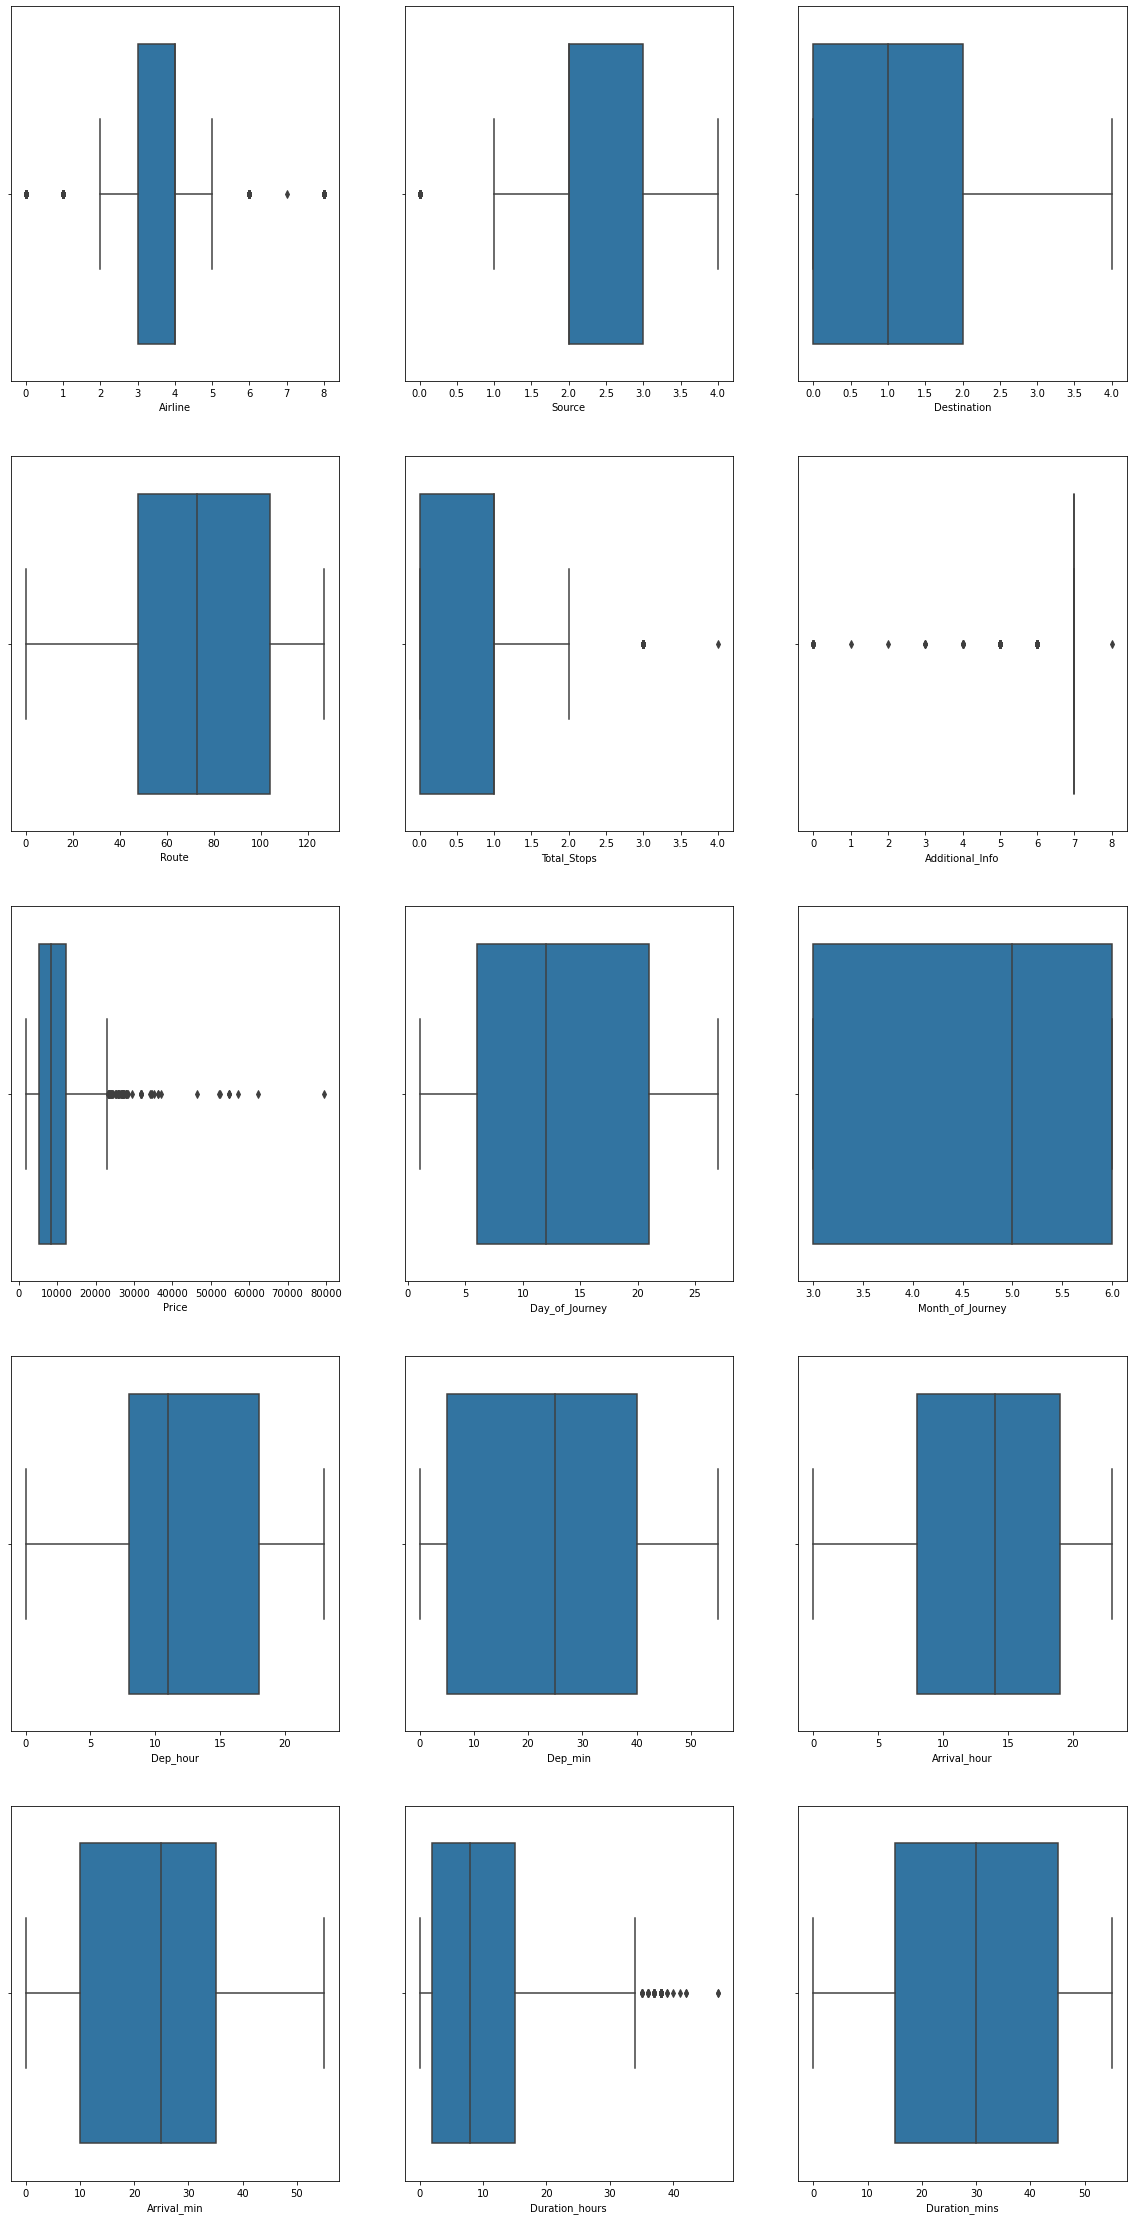

In [46]:
plt.figure(figsize = (20,40))

plotno = 1

for column in df:
    if plotno<=15:
        ax = plt.subplot(5,3,plotno)
        sns.boxplot(df[column], orient = "V")
        plt.xlabel(column)
        
    plotno +=1
    
plt.tight_layout
plt.tight_layout

## Checking for Skewness:

C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

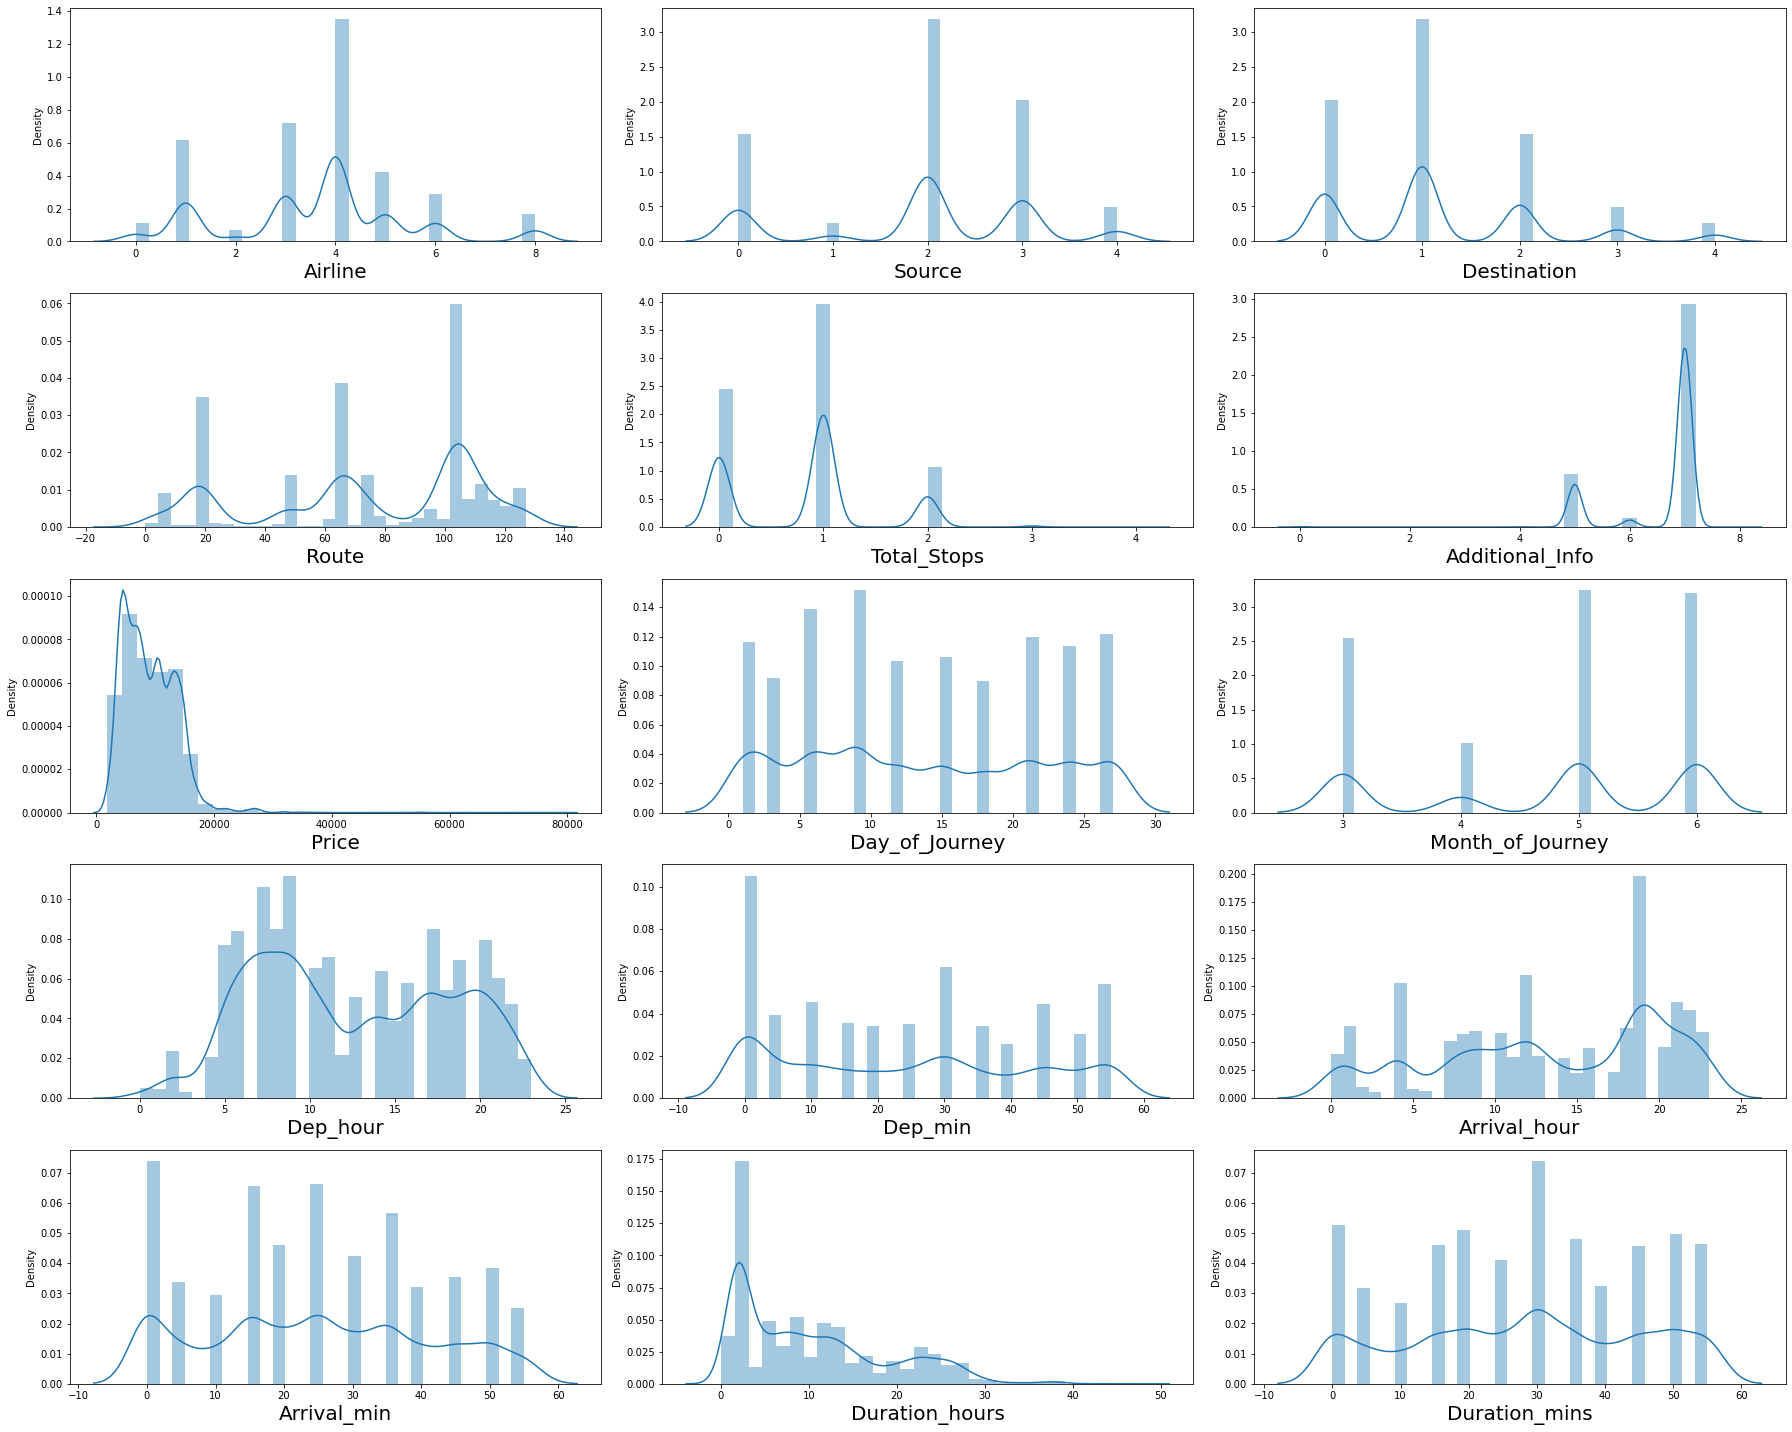

In [47]:
#Lets have a look on distribution of our data
plt.figure(figsize = (25,20))
plotnumber = 1
for column in df.columns:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column], bins=30)
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

By looking at the above boxplots & distribution plots we can see,
* skewness in many columns, but these are categorical data,
* we can remove outliers from Duration_hours and Total_Stops as these are int data.
* At first we will remove outliers from our data. thereafter again will check skewness.

In [48]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

## Removing Outliers:

In [49]:
#lets check the shape before removal of outliers
df.shape

(10682, 15)

In [50]:
# Applying zscore method for removing outliers from skewed features

from scipy import stats
from scipy.stats import zscore

z_score = zscore(df[["Duration_hours","Total_Stops"]])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]

df.reset_index(inplace = True)

In [51]:
#lets check the shape after removal of outliers
df.shape

(10583, 16)

In [52]:
# Checking data lost

print ('Data lost = ', ((10682-10583)/10682)*100 , '%')

Data lost =  0.9267927354428009 %


In [53]:
#lets check the actual skewness
df.skew()

index               0.001150
Airline             0.132161
Source             -0.422866
Destination         0.844085
Route              -0.496897
Total_Stops         0.223931
Additional_Info    -2.107240
Price               1.836795
Day_of_Journey      0.115429
Month_of_Journey   -0.396832
Dep_hour            0.100933
Dep_min             0.166199
Arrival_hour       -0.362019
Arrival_min         0.107319
Duration_hours      0.762175
Duration_mins      -0.097733
dtype: float64

* As our data is categorical, so no need to worry about treating the skewness.

In [54]:
df

,index,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0,3.0,0.0,2.0,18.0,0.0,7.0,3897,24,3,22,20,1,10,2,50
1,1,1.0,3.0,0.0,84.0,2.0,7.0,7662,1,5,5,50,13,15,7,25
2,2,4.0,2.0,1.0,118.0,2.0,7.0,13882,9,6,9,25,4,25,19,0
3,3,3.0,3.0,0.0,91.0,1.0,7.0,6218,12,5,18,5,23,30,5,25
4,4,3.0,0.0,2.0,29.0,1.0,7.0,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10578,10678,0.0,3.0,0.0,64.0,0.0,7.0,4107,9,4,19,55,22,25,2,30
10579,10679,1.0,3.0,0.0,64.0,0.0,7.0,4145,27,4,20,45,23,20,2,35
10580,10680,4.0,0.0,2.0,18.0,0.0,7.0,7229,27,4,8,20,11,20,3,0
10581,10681,8.0,0.0,2.0,18.0,0.0,7.0,12648,1,3,11,30,14,10,2,40


### splitting the features and target variable:

In [55]:
x = df.drop('Price', axis = 1)
y = df['Price']

In [56]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10578     4107
10579     4145
10580     7229
10581    12648
10582    11753
Name: Price, Length: 10583, dtype: int64

In [57]:
x

,index,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0,3.0,0.0,2.0,18.0,0.0,7.0,24,3,22,20,1,10,2,50
1,1,1.0,3.0,0.0,84.0,2.0,7.0,1,5,5,50,13,15,7,25
2,2,4.0,2.0,1.0,118.0,2.0,7.0,9,6,9,25,4,25,19,0
3,3,3.0,3.0,0.0,91.0,1.0,7.0,12,5,18,5,23,30,5,25
4,4,3.0,0.0,2.0,29.0,1.0,7.0,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10578,10678,0.0,3.0,0.0,64.0,0.0,7.0,9,4,19,55,22,25,2,30
10579,10679,1.0,3.0,0.0,64.0,0.0,7.0,27,4,20,45,23,20,2,35
10580,10680,4.0,0.0,2.0,18.0,0.0,7.0,27,4,8,20,11,20,3,0
10581,10681,8.0,0.0,2.0,18.0,0.0,7.0,1,3,11,30,14,10,2,40


### Data scaling of features:

In [58]:
# Data Scaling Using RobustScaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [59]:
x.head()

,index,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,-0.998502,-1.0,-2.0,0.5,-0.982143,-1.0,0.0,0.800000,-0.666667,1.0,-0.142857,-1.181818,-0.6,-0.461538,0.666667
1,-0.998315,-3.0,1.0,-0.5,0.196429,1.0,0.0,-0.733333,0.000000,-0.7,0.714286,-0.090909,-0.4,-0.076923,-0.166667
2,-0.998128,0.0,0.0,0.0,0.803571,1.0,0.0,-0.200000,0.333333,-0.3,0.000000,-0.909091,0.0,0.846154,-1.000000
3,-0.997941,-1.0,1.0,-0.5,0.321429,0.0,0.0,0.000000,0.000000,0.6,-0.571429,0.818182,0.2,-0.230769,-0.166667
4,-0.997754,-1.0,-2.0,0.5,-0.785714,0.0,0.0,-0.733333,-0.666667,0.4,0.714286,0.636364,0.4,-0.307692,0.500000


* **Now our Data is ready for Modeling.**

# Modelling:
### Finding best random state:

In [61]:
# Importing Linear Regression model for getting best random state 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

maxr2 = 0
maxRS=0

for i in range(0,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predf=LR.predict(x_test)
    r2_sc = r2_score(y_test, predf)
    
    if r2_sc>maxr2:
        maxr2=r2_sc
        macRS = i
print('Best R2score=',maxr2, "Random state=",macRS) 

Best R2score= 0.521341819625085 Random state= 229


### Creating Train_Test_Split:

In [62]:
# Spitting data into training and testing dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=macRS)

In [63]:
y_train

6649     4588
3508    13626
2163    10368
5861    10919
9228     6460
        ...  
1704     3332
867      7618
5596    10262
4909     5228
8537    13731
Name: Price, Length: 7937, dtype: int64

## 1. Linear Regression:

r2 Score for Linear Regression: 52.1341819625085%


C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


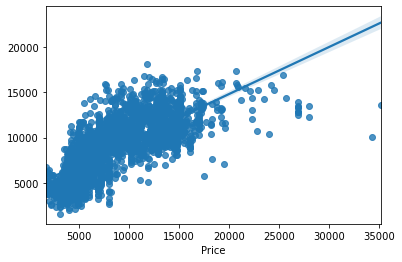

In [68]:
# Going for Linear Regression model
LR = LinearRegression()
LR.fit(x_train,y_train)

predf=LR.predict(x_test)
r2_sc = r2_score(y_test, predf)

print(f"""r2 Score for Linear Regression: {r2_sc*100}%""")

sns.regplot(y_test,predf)
plt.show()

## 2. KNN model:

r2 Score for KNN: 80.56708504007001%


C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


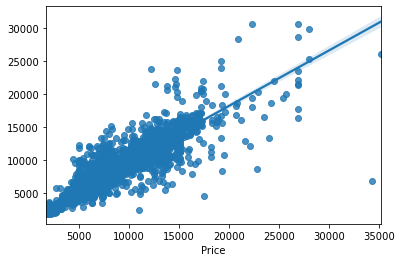

In [70]:
# Checking with KNN model
from sklearn.neighbors import KNeighborsRegressor
KN = KNeighborsRegressor()
KN.fit(x_train,y_train)

predf=KN.predict(x_test)
r2_sc = r2_score(y_test, predf)

print(f"""r2 Score for KNN: {r2_sc*100}%""")

sns.regplot(y_test,predf)
plt.show()

## 3. Decission Tree Regressor:

r2 Score for Decission_Tree_Regressor: 83.23614438292998%


C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


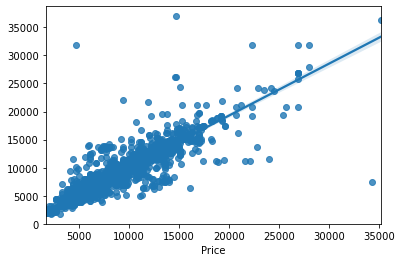

In [71]:
# Checking for DecissionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

DT =  DecisionTreeRegressor()

DT.fit(x_train,y_train)

predf=DT.predict(x_test)
r2_sc = r2_score(y_test, predf)

print(f"""r2 Score for Decission_Tree_Regressor: {r2_sc*100}%""")

sns.regplot(y_test,predf)
plt.show()

## 4. AdaBoostRegressor:

r2 Score for AdaBoostRegressor : 28.7602494441656%


C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


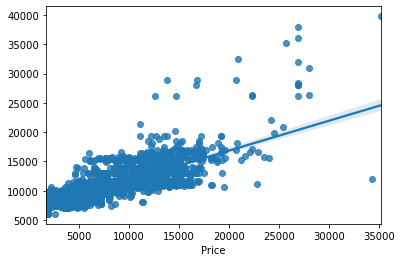

In [72]:
# Checking for AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
AD =  AdaBoostRegressor()
AD.fit(x_train,y_train)

predf=AD.predict(x_test)
r2_sc = r2_score(y_test, predf)

print(f"""r2 Score for AdaBoostRegressor : {r2_sc*100}%""")

sns.regplot(y_test,predf)
plt.show()

## 5. Random Forest Regressor:

r2 Score for Random Forest Regressor : 90.69766543543315%


C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


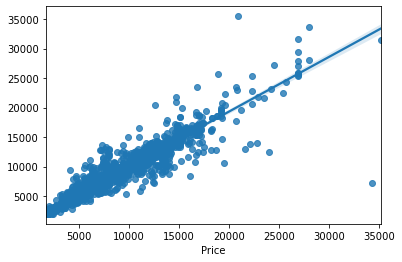

In [73]:
# Checking for RandomForest
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()

RF.fit(x_train,y_train)

predf=RF.predict(x_test)
r2_sc = r2_score(y_test, predf)

print(f"""r2 Score for Random Forest Regressor : {r2_sc*100}%""")

sns.regplot(y_test,predf)
plt.show()

## 6. XGBRegressor:

r2 Score for XGBRegressor : 88.55687048827498%


C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


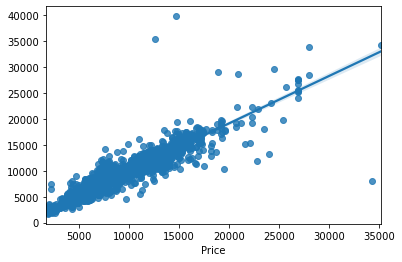

In [75]:
import xgboost as xgb
xgb= xgb.XGBRegressor()
xgb.fit(x_train,y_train)

predf=xgb.predict(x_test)
r2_sc = r2_score(y_test, predf)

print(f"""r2 Score for XGBRegressor : {r2_sc*100}%""")

sns.regplot(y_test,predf)
plt.show()

## Checking the Cross Validation Score:

In [78]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x,y, cv=5)
print("Cross validation score for Linear Regression is", scr.mean()*100,'%')

scr = cross_val_score(KN, x,y, cv=5)
print("Cross validation score for KNN is", scr.mean()*100,'%')


scr = cross_val_score(DT, x,y, cv=5)
print("Cross validation score for DecisionTreeRegressor is", scr.mean()*100,'%')

scr = cross_val_score(RF, x,y, cv=5)
print("Cross validation score for RANDOM FOREST is", scr.mean()*100,'%')

scr = cross_val_score(AD, x,y, cv=5)
print("Cross validation score for ADa boost is", scr.mean()*100,'%')

scr = cross_val_score(xgb, x,y, cv=5)
print("Cross validation score for XG Bootst Regressor is", scr.mean()*100,'%')

Cross validation score for Linear Regression is 45.551247668378814 %
Cross validation score for KNN is 76.51161782654388 %
Cross validation score for DecisionTreeRegressor is 78.812908606289 %
Cross validation score for RANDOM FOREST is 88.2490944547447 %
Cross validation score for ADa boost is 34.398945459079215 %
Cross validation score for XG Bootst Regressor is 88.41978872906458 %


Above are the cross validation score for all the models used:

* Our Random Forest giving the maximum accuracy results. but,
* The difference between accuracy score and cross validation score of XG Bootst Regressor is very less compared to other models.
* So we can conclude that 'XG Bootst Regressor' as our best fitting model.

## Hyper Parameter Tuning:

In [79]:
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor

In [80]:
from sklearn.model_selection import GridSearchCV
param_tuning = {
        'learning_rate': [0.1,1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [0.5,1, 3, 5],
        'subsample': [0.3,0.5 ,0.7],
        'colsample_bytree': [0.3,0.5, 0.7],
        'n_estimators' : [200, 500,],
        'objective': ['reg:squarederror']
    }

In [81]:
xgb_model = XGBRegressor()

gsearch = GridSearchCV(estimator = xgb_model, param_grid = param_tuning,cv = 5,n_jobs = -1,verbose = 1)

gsearch.fit(x_train,y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    val

In [82]:
gsearch.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 3,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

* These are the best parameter values.

In [84]:
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.7,
        learning_rate = 0.1,
        max_depth = 7,
        min_child_weight = 3,
        n_estimators = 500,
        subsample = 0.7)

xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
y_pred = xgb_model.predict(x_test)

print('r2_score:',r2_score(y_pred,y_test)*100,"%")

r2_score: 90.35478527177202 %


C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


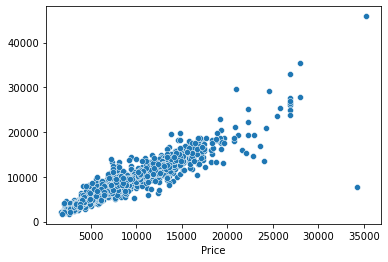

In [86]:
# Checking predicted vs Actual

sns.scatterplot(y_test, y_pred) 
plt.show()

C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


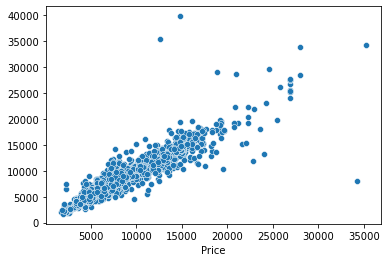

In [87]:
# Checking predicted vs Actual

sns.scatterplot(y_test,  predf) 
plt.show()

* Since our XGB model after tunning is performing better, saving the XGB model.

In [89]:
import joblib
joblib.dump(xgb_model,'Flight_Price_Prediction.pkl')

['Flight_Price_Prediction.pkl']

# Conclusion :-
* Total_stops has the highest importance in predicting 'Price', followed by Duration_Hours.
* Our Random Forest giving the maximum accuracy results. but,
* The difference between accuracy score and cross validation score of XG Bootst Regressor is very less compared to other models.
* **So we can conclude that 'XG Bootst Regressor' as our best fitting model.**
* The final Accuracy for the prediction of Price of the flight is = 90.35% after tuning.